# Report 5 - Dynamic Programming
### Jakub Jagła, Łukasz Borak - Laboratories group 3, Algorithms and Data Structures
*** 

## Descriptions

1. **Knapsack problem** - in the knapsack problem we are presented with a "knapsack" of a particular *capacity* as well as a set of items, each having an assigned *weight* and *value*. The goal of the problem is to find a particular combination of the items, such that the *value* is maximised, but the total *weight* is not larger than the *capacity* of the knapsack.


2. **Partition problem** - when solving the partition problem we need to determine whether a given multiset $S$ can be split into two subsets $s_1$ and $s_2$, such that the sum of both sets is equal.

**Time complexity for the Knapsack problem:** $O(nW)$, where $W$ is the maximum capacity of the knapsack.

Both the knapsack problem and the set partition problem are NP-hard as an already computed solution can be easily checked in polynomial time, however the time needed for generating an optimal or even valid solutions can increase very quickly. 

## Using the knapsack problem algorithm to solve the partition problem

We will treat our knapsack problem algorithm as a black box. To solve the partition problem we will create an array of items $I$ which will be the length of our multiset $S$. For each item $I_j$, $weight(I_j) = value(I_j) = S_j$

We set the maximum capacity to $\frac{sum(S)}{2}$, assuming that the sum is not odd.

If the maximum value of the items returned by the knapsack algorithm is equal to $\frac{sum(S)}{2}$, then this means we found a subset $s_1$ whose sum is equal to half of the total sum, which in turn means that the rest of the multiset $S$ creates a second subset $s_2$, which sum is also equal to half of the total sum, therefore the sums of both subsets are equal.

## Code

### Knapsack problem solution

In [2]:
def knapsack(weights, profit, max_weight):
    tab = [[0 for _ in range(max_weight + 1)] for _ in range(len(profit) + 1)]

    for i in range(1, len(tab)): # i = items
        for j in range(len(tab[i])): # j = weights
            if weights[i-1] <= j: # check if it doesn't exceed the weights
                tab[i][j] = max(profit[i-1] + tab[i-1][j-weights[i-1]], tab[i-1][j])
            else:
                tab[i][j] = tab[i-1][j]

    return tab

Testing

In [3]:
weights, profit = [3, 1, 4, 1, 5], [2, 3, 1, 1, 8]
max_weight = 6

answer = knapsack(weights, profit, max_weight)

for row in answer:
    print(row)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 2, 2, 2]
[0, 3, 3, 3, 5, 5, 5]
[0, 3, 3, 3, 5, 5, 5]
[0, 3, 4, 4, 5, 6, 6]
[0, 3, 4, 4, 5, 8, 11]


Solving the partition problem

In [5]:
def partition_solution(S):
    mcap = sum(S)/2
    if mcap%1:
        return False #multisets with odd sum cannot be partition equally
    
    answer = knapsack(S,S,int(mcap))
    return answer[-1][-1] == mcap


print(partition_solution([1,2,3,4]))

True


### Timer

In [ ]:
from timeit import timeit
import random
import numpy as np

sizes, timings = range(10, 1000, 10), []

for i in sizes:
    weights, profit = np.random.randint(1, 50, i), np.random.randint(1, 50, i)
    max_weight = random.randint(min(weights), max(weights))

    time = timeit(lambda: knapsack(weights, profit, max_weight), number=1)
    timings.append(time)
    print(i, time)

## Graphs

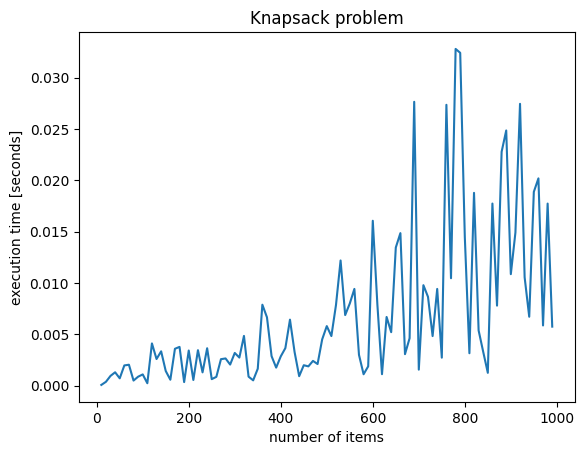

In [18]:
import matplotlib.pyplot as plt

plt.plot(sizes, timings)
plt.title('Knapsack problem')
plt.xlabel('number of items')
plt.ylabel('execution time [seconds]')
plt.show()